In [33]:
import pandas as pd
from collections import Counter
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
df = pd.read_csv('../Data/Recipes.csv')

In [35]:
df["num_steps_instructions"] = df.apply(lambda _: 0, axis=1)
for index, value in enumerate(df.analyzedInstructions):
    if type(value) == str:
        df["num_steps_instructions"][index] = value.count('''{'number': ''')

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [36]:
df.drop(columns = ['Unnamed: 0', 'spoonacularScore', 'id'], inplace = True)

In [37]:
df["primal"] = df.apply(lambda _: '', axis=1)
df["paleo"] = df.apply(lambda _: '', axis=1)
for index, value in enumerate(df.diets):
    if 'primal' in value:
        df.primal[index] = 1
    else:
        df.primal[index] = 0
    if 'paleolithic' in value:
        df.paleo[index] = 1
    else:
        df.paleo[index] = 0

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

In [19]:
df.columns

Index(['aggregateLikes', 'analyzedInstructions', 'cookingMinutes', 'dairyFree',
       'diets', 'dishTypes', 'extendedIngredients', 'glutenFree',
       'healthScore', 'ketogenic', 'lowFodmap', 'num_ingredients',
       'preparationMinutes', 'pricePerServing', 'readyInMinutes', 'servings',
       'spoonacularSourceUrl', 'sustainable', 'title', 'vegan', 'vegetarian',
       'veryHealthy', 'veryPopular', 'weightWatcherSmartPoints', 'whole30',
       'Calories', 'Fat', 'Saturated_Fat', 'Carbohydrates', 'Sugar',
       'Cholesterol', 'Sodium', 'Protein', 'Vitamin_K', 'Vitamin_A',
       'Vitamin_C', 'Manganese', 'Folate', 'Fiber', 'Copper', 'Magnesium',
       'Phosphorus', 'Vitamin_B6', 'Potassium', 'Vitamin_B1', 'Iron',
       'Vitamin_B2', 'Vitamin_E', 'Zinc', 'Vitamin_B5', 'Vitamin_B3',
       'Calcium', 'Selenium', 'num_words_instructions',
       'num_steps_instructions', 'ingredients_list', 'ingredient_types',
       'primal', 'paleo'],
      dtype='object')

In [40]:
df.to_csv('../Data/Recipes_raw.csv')

In [41]:
df.drop(columns = ['analyzedInstructions', 'diets', 'extendedIngredients',
                  'dairyFree','dishTypes','glutenFree','healthScore', 'ketogenic', 
                   'lowFodmap','sustainable', 'veryHealthy', 'veryPopular',], inplace = True)

In [42]:
cols_to_scale = ['cookingMinutes', 'num_ingredients','preparationMinutes', 
                 'pricePerServing', 'readyInMinutes', 'servings','weightWatcherSmartPoints',
                'Calories', 'Fat', 'Saturated_Fat', 'Carbohydrates', 'Sugar','Cholesterol', 
                 'Sodium', 'Protein', 'Vitamin_K', 'Vitamin_A','Vitamin_C', 'Manganese', 
                 'Folate', 'Fiber', 'Copper', 'Magnesium','Phosphorus', 'Vitamin_B6', 
                 'Potassium', 'Vitamin_B1', 'Iron','Vitamin_B2', 'Vitamin_E', 'Zinc', 
                 'Vitamin_B5', 'Vitamin_B3','Calcium', 'Selenium', 'num_words_instructions',
                 'num_steps_instructions']

In [43]:
ss = StandardScaler()

In [44]:
df_ss = pd.DataFrame(ss.fit_transform(df[cols_to_scale].values), columns=cols_to_scale)

In [45]:
diets_list = ['whole30','vegan', 'vegetarian', 'paleo', 'primal']
for diet in diets_list:
    df_ss[diet] = df[diet]

In [46]:
df_ss['aggregateLikes'] = df['aggregateLikes']
categorical_list = 'ingredients_list', 'ingredient_types', 'title', 'spoonacularSourceUrl'
for category in categorical_list:
    df_ss[category] = df[category]

In [48]:
df_ss_paleo = df_ss[df_ss['paleo'] == 1]
df_ss_primal = df_ss[df_ss['primal'] == 1]
df_ss_whole30 = df_ss[df_ss['whole30'] == True]
df_ss_vegetarian = df_ss[df_ss['vegetarian'] == True]
df_ss_vegan = df_ss[df_ss['vegan'] == True]

In [51]:
df_ss_paleo.to_csv('../Data/scaled_paleo.csv')
df_ss_whole30.to_csv('../Data/scaled_whole30.csv')
df_ss_primal.to_csv('../Data/scaled_primal.csv')
df_ss_vegetarian.to_csv('../Data/scaled_vegetarian.csv')
df_ss_vegan.to_csv('..Data/scaled_vegan.csv')

FileNotFoundError: [Errno 2] No such file or directory: '..Data/scaled_paleo.csv'

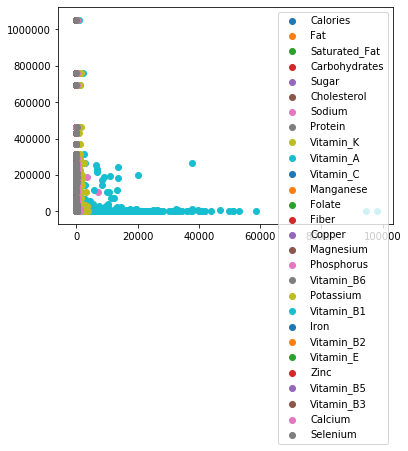

In [122]:
for col in nutrition_df:
    plt.scatter(y = outcome_df, x = nutrition_df[col], label = f'{col}')
plt.legend()
plt.show()

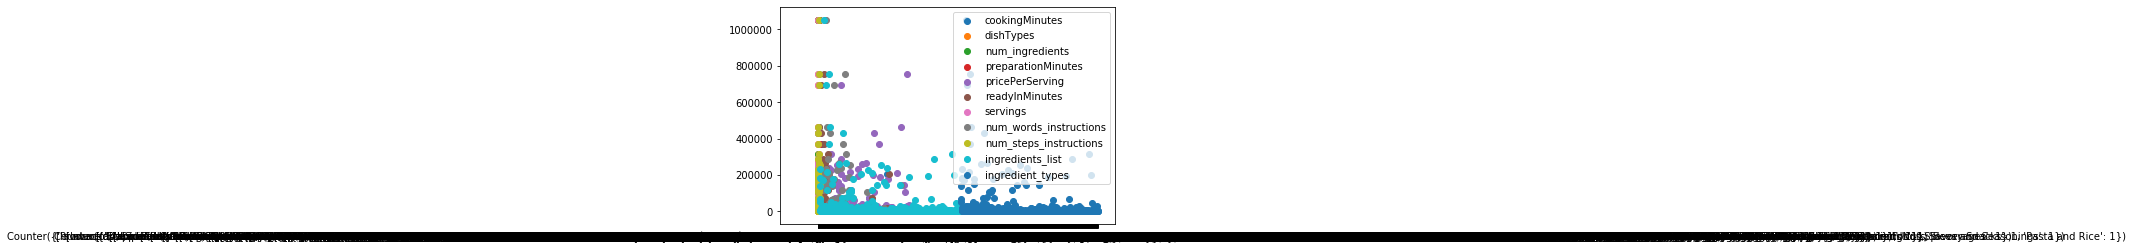

In [123]:
for col in convenience_df:
    plt.scatter(y = outcome_df, x = convenience_df[col], label = f'{col}')
plt.legend()
plt.show()

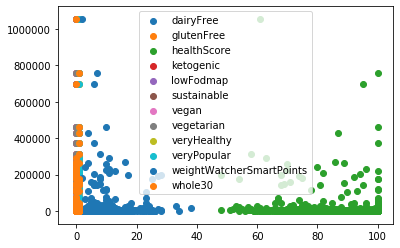

In [124]:
for col in diets_df:
    plt.scatter(y = outcome_df, x = diets_df[col], label = f'{col}')
plt.legend()
plt.show()